<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

чтоб результаты были детерминированы

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [240]:
testik = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv').iloc[0]

In [241]:
testik

name             Maruti Swift Dzire VDI
year                               2014
selling_price                    450000
km_driven                        145500
fuel                             Diesel
seller_type                  Individual
transmission                     Manual
owner                       First Owner
mileage                       23.4 kmpl
engine                          1248 CC
max_power                        74 bhp
torque                   190Nm@ 2000rpm
seats                               5.0
Name: 0, dtype: object

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [4]:
df_test.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [5]:
df_train.duplicated().value_counts()

False    6014
True      985
Name: count, dtype: int64

In [6]:
df_test.duplicated().value_counts()

False    938
True      62
Name: count, dtype: int64

In [7]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")

In [8]:
profile.to_file("df_train_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

1) Максимальное пройденное расстояние в км 2360457, это вооще что за машина такая
2) 14 сидений автобус явно продают
3) km_driven хорошо коррелирует с годом выпуска, что должно быть, навреное, очевидно
4) selling_price хорошо коррелирует с годом машины и трансмиссией (автомат подороже явно дапдап)

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [9]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [10]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [11]:
df_test.describe().loc[['mean', '50%']]

year  selling_price  km_driven     seats
mean  2013.681     617901.042  71393.341  5.410805
50%   2014.000     434999.000  61500.000  5.000000

In [12]:
df_train.describe().loc[['mean', '50%']]

year  selling_price     km_driven     seats
mean  2013.818403  639515.197171  69584.615517  5.419008
50%   2015.000000  450000.000000  60000.000000  5.000000

Средние и медианы похожи между собой, что говорит о том, что скорее всего распределения и теста, и трейна одинаковы. Не будет ситуации, когда у нас в трейне одни статистики, а в тесте совершенно другие.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [13]:
df_train.drop(columns=['selling_price']).duplicated().value_counts()

False    5840
True     1159
Name: count, dtype: int64

In [14]:
df_train[df_train.drop(columns=['selling_price']).duplicated()].head()

name  year  selling_price  km_driven  \
254                  Hyundai Grand i10 Sportz  2017         450000      35000   
258                          Maruti Swift VXI  2012         330000      50000   
268                    Maruti Swift Dzire VXI  2014         400000      70000   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   
325                             Lexus ES 300h  2019        5150000      20000   

       fuel seller_type transmission         owner     mileage   engine  \
254  Petrol  Individual       Manual   First Owner   18.9 kmpl  1197 CC   
258  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
268  Petrol  Individual       Manual  Second Owner   19.1 kmpl  1197 CC   
324  Diesel      Dealer    Automatic   First Owner   13.6 kmpl  1999 CC   
325  Petrol      Dealer    Automatic   First Owner  22.37 kmpl  2487 CC   

      max_power               torque  seats  
254      82 bhp       114Nm@ 4000rpm    5.0  
258    85.8 bhp       114Nm@ 4000rpm    5.0  
268    85.8 bhp       114Nm@ 4000rpm    5.0  
324     177 bhp  430Nm@ 1750-2500rpm    5.0  
325  214.56 bhp  202Nm@ 3600-5200rpm    5.0

In [15]:
df_train = df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns, keep='first')

In [16]:
df_train.reset_index(drop=True, inplace=True)

In [17]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [18]:
from math import isnan

def converte_mileage(mil):
    if mil is None or (isinstance(mil, float) and isnan(mil)): return None
    if mil.split(' ')[1] == 'kmpl':
        return float(mil.split(' ')[0]) / 1.40
    return float(mil.split(' ')[0])

def converte_engine(eng):
    if eng is None or (isinstance(eng, float) and isnan(eng)): return None
    return float(eng.split(' ')[0])

def converte_max_power(mp):
    if (
        mp is None or 
        (isinstance(mp, str) and mp.split(' ')[0] == '') or
        (isinstance(mp, float) and isnan(mp))
    ): return None
    return float(mp.split(' ')[0])

In [19]:
df_train.loc[:, 'mileage'] = df_train['mileage'].apply(converte_mileage).astype(float)
df_test.loc[:, 'mileage'] = df_test['mileage'].apply(converte_mileage).astype(float)

In [20]:
df_train.loc[:, 'engine'] = df_train['engine'].apply(converte_engine).astype(float)
df_test.loc[:, 'engine'] = df_test['engine'].apply(converte_engine).astype(float)

In [21]:
df_train.loc[:, 'max_power'] = df_train['max_power'].apply(converte_max_power).astype(float)
df_test.loc[:, 'max_power'] = df_test['max_power'].apply(converte_max_power).astype(float)

In [22]:
import re

def extract_torque_rpm(entry):
    if entry is None or entry == '' or (isinstance(entry, float) and isnan(entry)): return None, None
    pattern = re.compile(
        r"""
        (?P<torque_value>\d+(?:\.\d+)?)
        \s*
        (?:Nm|nm|kgm)?
        \s*
        (?:@|at)?
        \s*
        (?P<rpm_range>[\d,]+(?:-[\d,]+)?)
        """,
        re.VERBOSE | re.IGNORECASE
    )
    match = pattern.search(entry)

    torque_value = match.group('torque_value')
    rpm_values = match.group('rpm_range')
    
    
    rpm_values = rpm_values.replace(',', '')
    
    if '-' in rpm_values:
        rpm_values = rpm_values.split('-')
        rpm_values = rpm_values[-1]
        
    if float(torque_value) <= 40: # оцениваю по порядку чтоб привести к nm, потому что где-то есть пропуски kgm или nm, так что плевать
        torque_value = float(torque_value)*9.8
    
    return torque_value, rpm_values


In [23]:
df_train.loc[:, 'max_torque_rpm'] = df_train['torque'].apply(lambda x: extract_torque_rpm(x)[1]).astype(float)
df_test.loc[:, 'max_torque_rpm'] = df_test['torque'].apply(lambda x: extract_torque_rpm(x)[1]).astype(float)

C:\Users\bende\AppData\Local\Temp\ipykernel_28508\1176986307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'max_torque_rpm'] = df_train['torque'].apply(lambda x: extract_torque_rpm(x)[1]).astype(float)


In [24]:
df_train.loc[:, 'torque'] = df_train['torque'].apply(lambda x: extract_torque_rpm(x)[0]).astype(float)
df_test.loc[:, 'torque'] = df_test['torque'].apply(lambda x: extract_torque_rpm(x)[0]).astype(float)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [25]:
medians = df_train[['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']].median()

In [26]:
for column in ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']:
    df_train.fillna({column: medians[column]}, inplace=True)
    df_test.fillna({column: medians[column]}, inplace=True)

C:\Users\bende\AppData\Local\Temp\ipykernel_28508\2041346628.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.fillna({column: medians[column]}, inplace=True)
C:\Users\bende\AppData\Local\Temp\ipykernel_28508\2041346628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna({column: medians[column]}, inplace=True)
C:\Users\bende\AppData\Local\Temp\ipykernel_28508\2041346628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

Нужно ставить медианы, а не средними, тк у нас может быть выброс в данных, который не репрезентативен, что сильно сместит среднее.

Также надо заполнять тестовые пропуски по трейновым данным, так как модель обучается на трейновые значения, да и в проде у нас будут только трейновые значения, а что происходит в рантайме мы знать офк не будем

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [27]:
df_train.loc[:, ['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test.loc[:, ['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

Seats в целом можно использовать как категориальную переменную, тк она может иметь какую-то нелинейную зависимость, которую линейные модели не уловят. 

Пример: два сиденья - какой-то спорткар -> дорогущий мама мия, потом 4 сиденья -> ну обычная машина может быть, а потом 14 сидений - микроавтобус какой-то -> дорогой (конечно может автобусы нынче дешевые, но мне кажется все же дорогой)

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [28]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    13.962239  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.020207   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    12.142857  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    13.857143  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    15.942857  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    33.440000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   171.189166     5.426712     3040.172603  
std      31.640418    83.700304     0.982344      920.492899  
min       0.000000    42.000000     2.000000        0.000000  
25%      68.000000   111.800000     5.000000     2250.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     4000.000000  
max     400.000000   789.000000    14.000000    21800.000000

Медиану очевидно не сдвинуть, как и все квантили, а вот среднее спокойно может сдвинуться, тк появились новые поля условно, которые сдвигают среднее к медиане.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

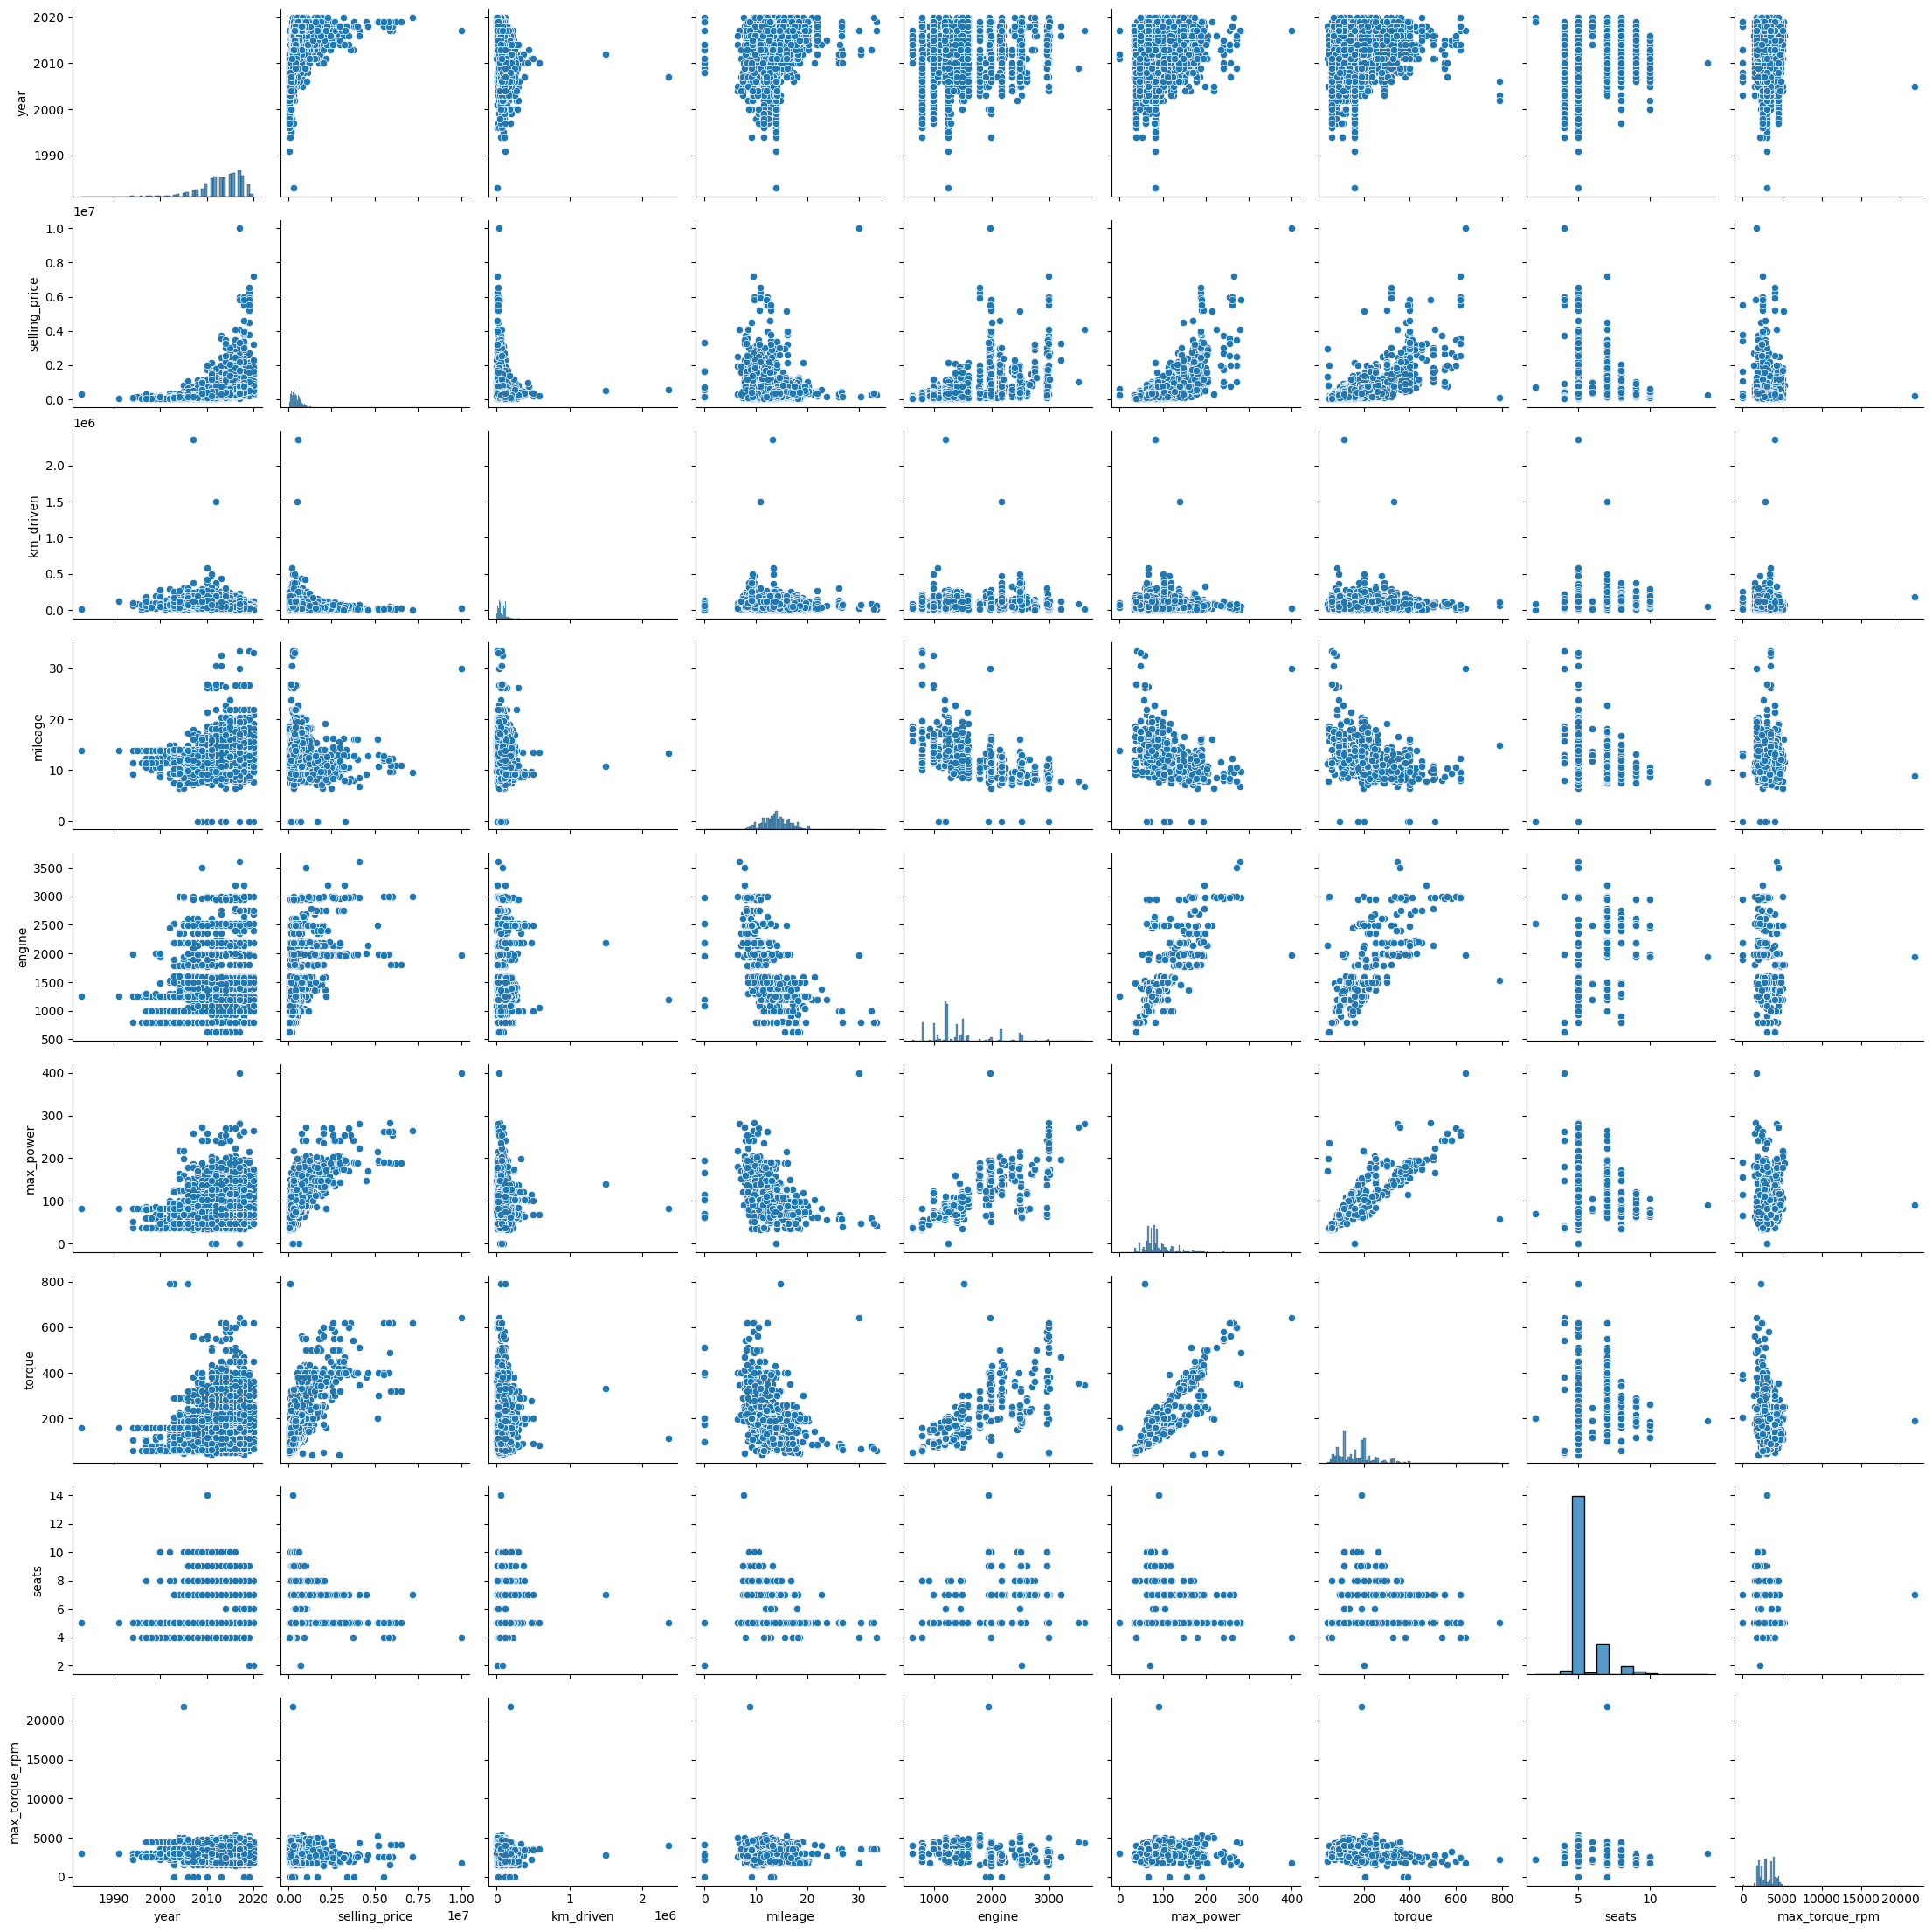

In [29]:
%matplotlib inline

sns.pairplot(df_train);

В Year, engine, max_power, tonque видна кое-какая линейная зависимость, из чего можно сделать, что наша целевая переменная зависит от признаков

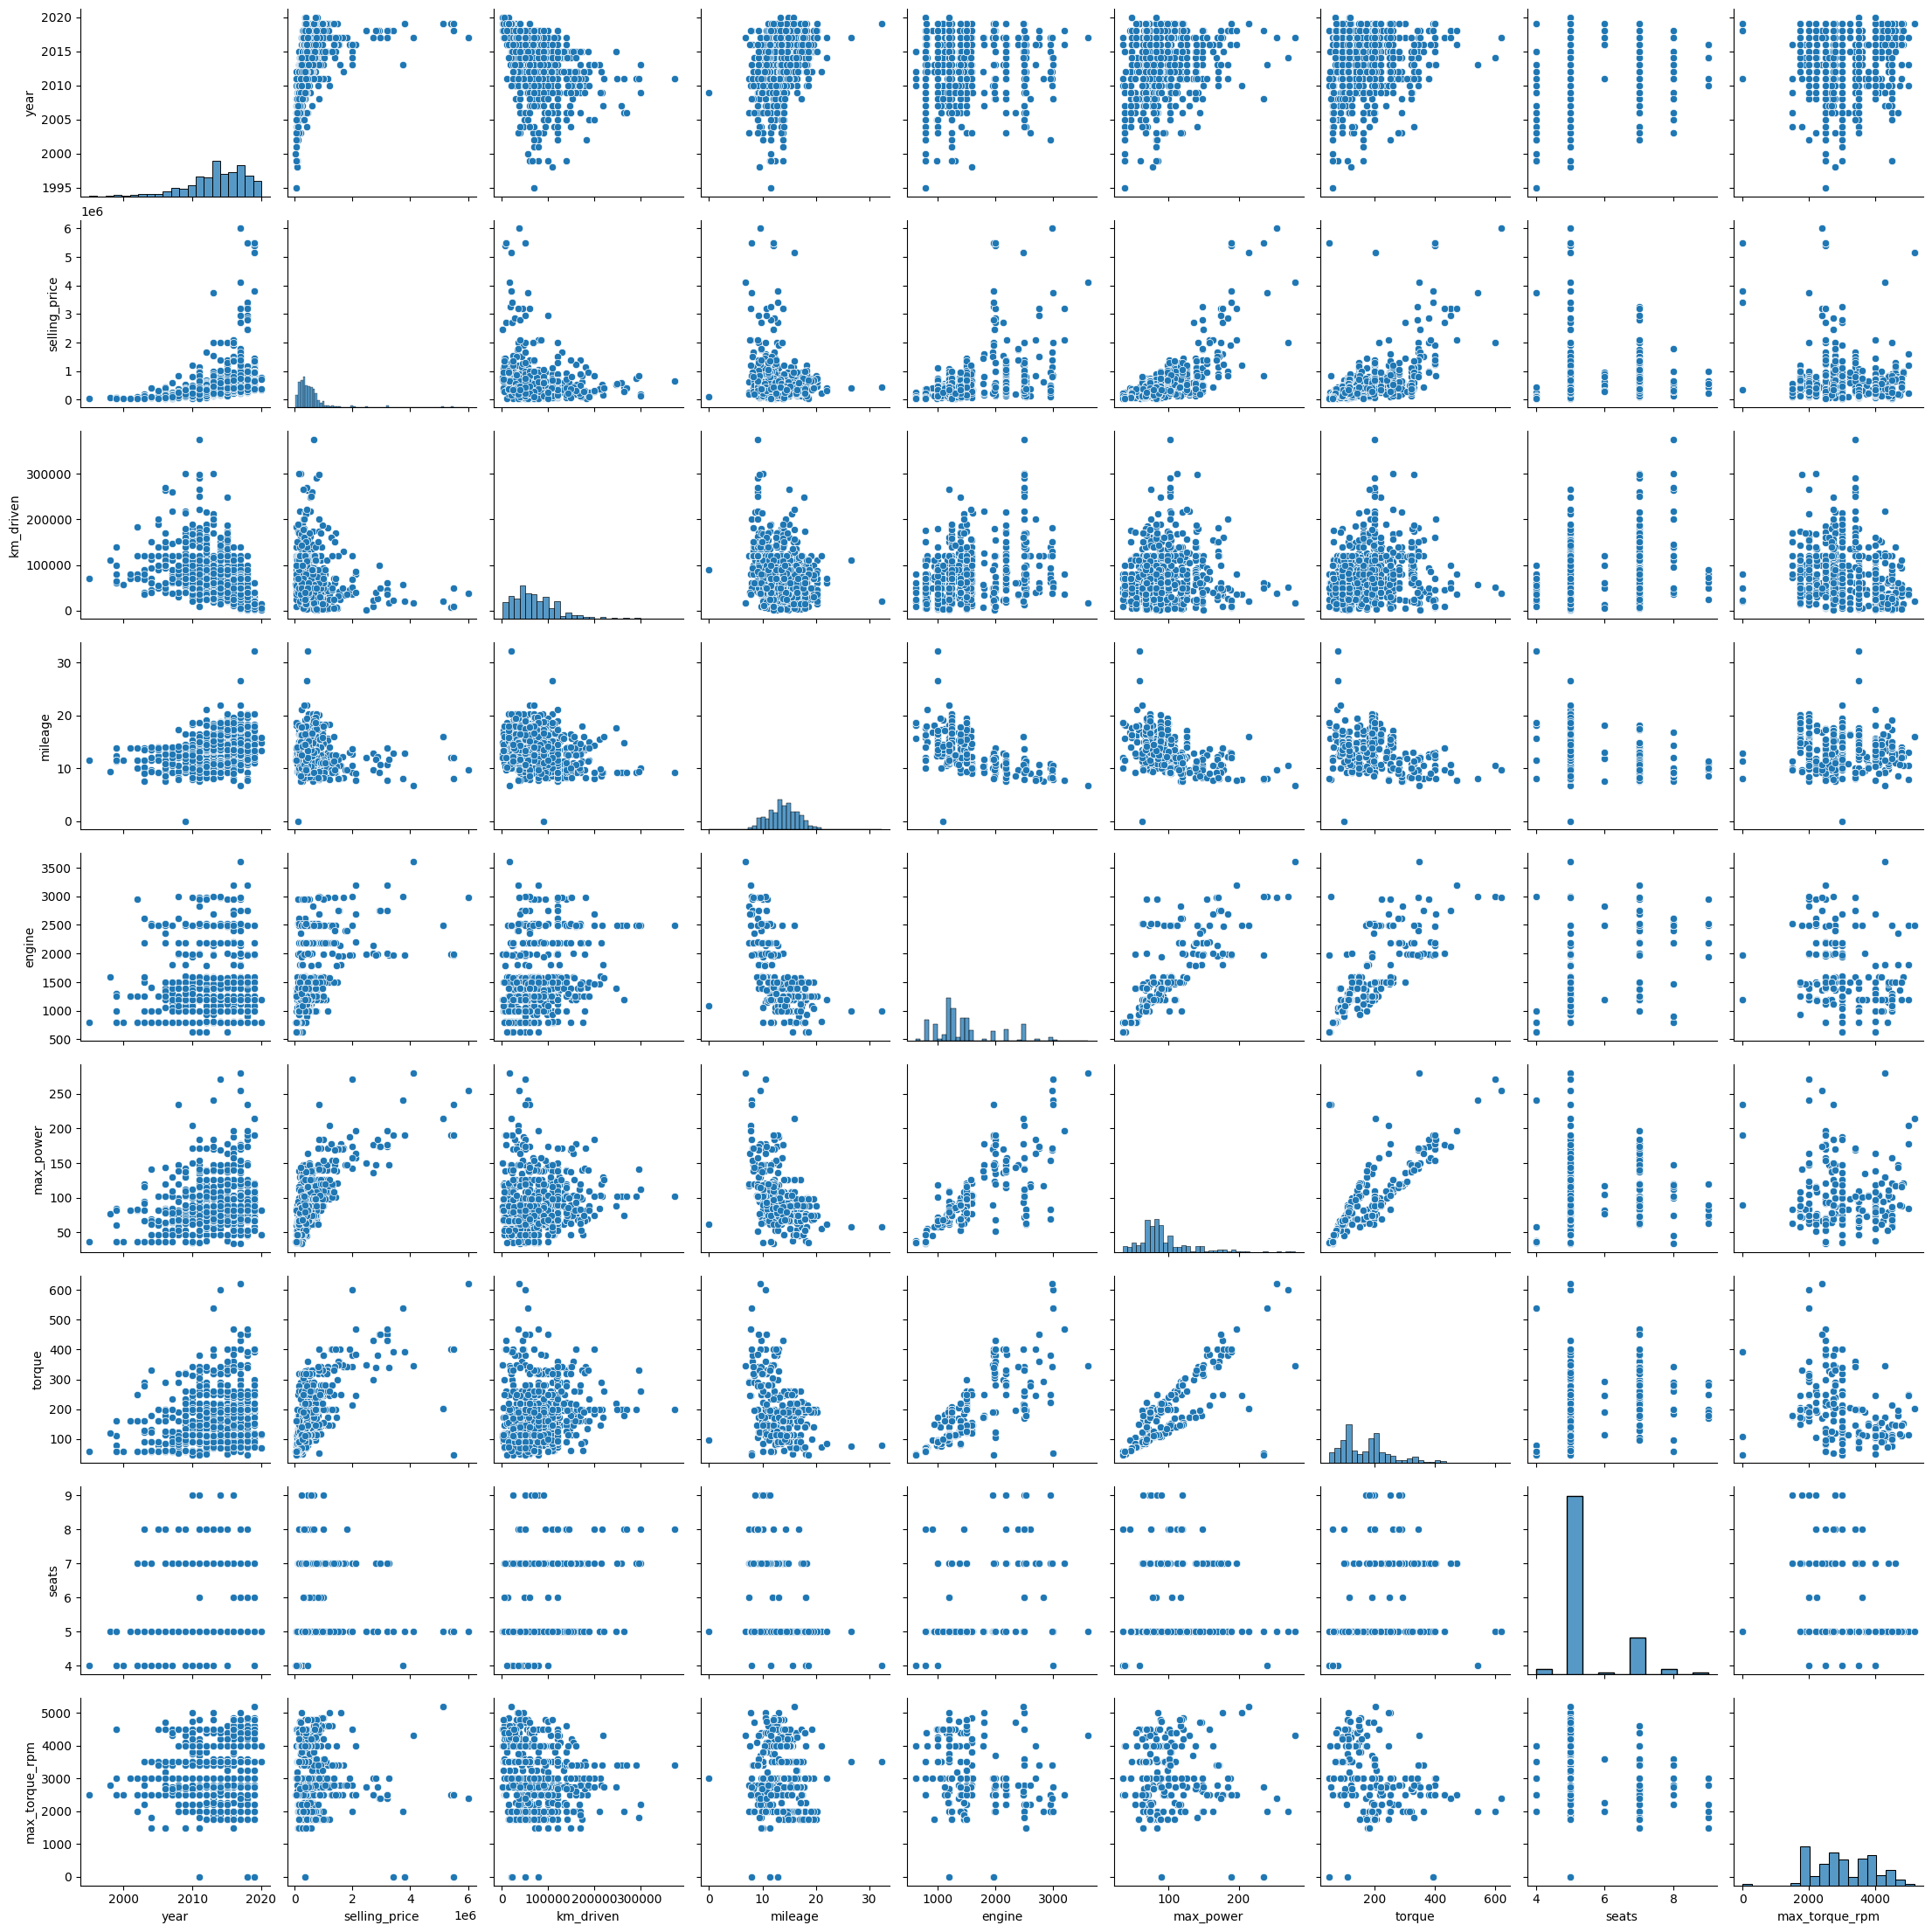

In [42]:

sns.pairplot(df_test);

Ну есть выброс в трейне есть таргет на порядок выше, чем максимальный в тесте. Тоже самое с torque_rpm в трейн влетело что-то большее 20к, хотя в тесте меньше 5к. А остальные распределения на глаз похожи в целом.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

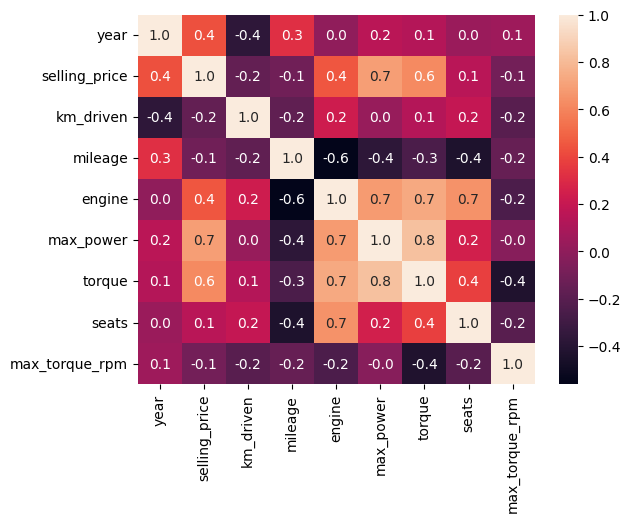

In [50]:
sns.heatmap(df_train[df_train.describe().columns].corr('pearson'), annot=True, fmt=".1f")

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Engine + year, km_driven + max_power
2) Самая сильная между torque + max_power
3) Да, такое в целом можно утверждать с корреляцией -0.4 i think

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [69]:
def spearman_correlation(
        data: pd.DataFrame, 
        first_col: str, 
        second_col: str
    ) -> float:
    
    n = len(data) - 1
    data.sort_values(by=first_col, inplace=True)
    data['rank_first'] = range(n + 1)
    data.sort_values(by=second_col, inplace=True)
    data['rank_second'] = range(n + 1)
    d = np.array(data['rank_second'] - data['rank_first'])
    return 1 - 6 * np.sum(d**2) / (n*(n**2 - 1))

In [72]:
spearman_correlation(df_train.copy(), 'torque', 'engine')

0.8328254562151864

In [49]:
df_train[df_train.describe().columns].corr('spearman')

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.340316 -0.038056   
selling_price   0.707123       1.000000  -0.295665  0.017140  0.463577   
km_driven      -0.569659      -0.295665   1.000000 -0.195916  0.304504   
mileage         0.340316       0.017140  -0.195916  1.000000 -0.438473   
engine         -0.038056       0.463577   0.304504 -0.438473  1.000000   
max_power       0.165798       0.612258   0.040919 -0.318908  0.713113   
torque          0.117074       0.589868   0.237784 -0.155452  0.832685   
seats           0.048291       0.317605   0.195317 -0.437778  0.527716   
max_torque_rpm  0.077304      -0.128507  -0.321381 -0.166536 -0.375326   

                max_power    torque     seats  max_torque_rpm  
year             0.165798  0.117074  0.048291        0.077304  
selling_price    0.612258  0.589868  0.317605       -0.128507  
km_driven        0.040919  0.237784  0.195317       -0.321381  
mileage         -0.318908 -0.155452 -0.437778       -0.166536  
engine           0.713113  0.832685  0.527716       -0.375326  
max_power        1.000000  0.775052  0.304857       -0.027998  
torque           0.775052  1.000000  0.433002       -0.538018  
seats            0.304857  0.433002  1.000000       -0.200693  
max_torque_rpm  -0.027998 -0.538018 -0.200693        1.000000

Ну что-то похожее получилось

In [80]:
%matplotlib inline

sns.heatmap(df_train.phik_matrix(), annot=True, fmt=".1f")

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

In [84]:
df_train[df_train.describe().columns].corr('pearson')

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.322860  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.111323  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.171749  0.229766   
mileage         0.322860      -0.111323  -0.171749  1.000000 -0.561690   
engine          0.002819       0.447672   0.229766 -0.561690  1.000000   
max_power       0.156858       0.692814   0.024588 -0.376646  0.681117   
torque          0.132017       0.619066   0.132789 -0.254699  0.735465   
seats           0.041178       0.149953   0.192328 -0.436971  0.652172   
max_torque_rpm  0.051051      -0.098564  -0.205092 -0.152348 -0.249531   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.132017  0.041178        0.051051  
selling_price    0.692814  0.619066  0.149953       -0.098564  
km_driven        0.024588  0.132789  0.192328       -0.205092  
mileage         -0.376646 -0.254699 -0.436971       -0.152348  
engine           0.681117  0.735465  0.652172       -0.249531  
max_power        1.000000  0.827247  0.244112       -0.027343  
torque           0.827247  1.000000  0.375131       -0.432423  
seats            0.244112  0.375131  1.000000       -0.202439  
max_torque_rpm  -0.027343 -0.432423 -0.202439        1.000000

In [90]:
res_phik = df_train.drop(columns=['name']).phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


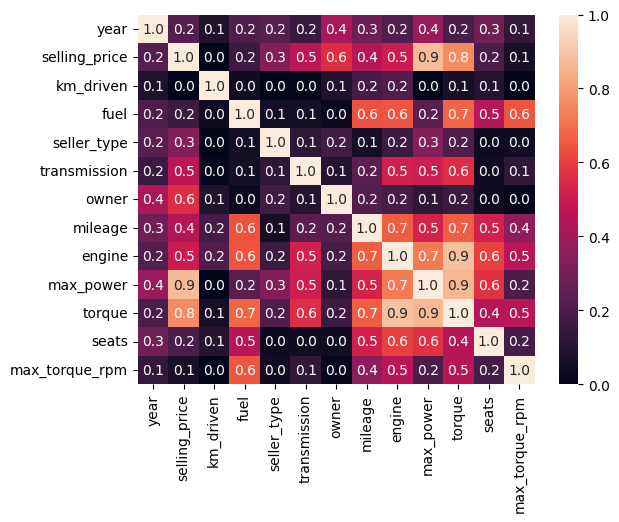

In [91]:
sns.heatmap(res_phik, annot=True, fmt=".1f");

Можно увидеть корреляцию с трансмиссией таких величин как engine, max_power, torque (на автомате машины менее мощные?)

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [38]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [94]:
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
torque            float64
seats             float64
max_torque_rpm    float64
dtype: object

In [30]:
feature_names = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']

y_train = df_train['selling_price']
X_train = df_train[feature_names]

In [31]:
X_train.shape

(5840, 6)

In [32]:
assert X_train.shape == (5840, 6)

In [33]:
y_test = df_test['selling_price']
X_test = df_test[feature_names]

In [34]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [36]:
r2_score(y_test, y_pred)

0.5715384872248228

In [37]:
MSE(y_test, y_pred)

246291912535.218

Получилась фигня)) Типа $R^2$ это слишком мало, значит мы плохо объясняем дисперсию, про MSE молчку, тк стоит смотреть RMSE хотя бы, чтоб метрика была интерпретируема

In [38]:
np.sqrt(MSE(y_test, y_pred))

496278.05969558837

В 50к ошибаться такое себе с учетом среднего в 600к, а медианы 450к

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [39]:
def r2(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2)/np.sum((y_true - np.mean(y_true))**2)

In [109]:
r2(y_test, y_pred)

0.5715384872248228

Нестрогое пояснение - это насколько наша модель предсказывает лучше чем константа (есть кстати интересные реализации для бинарной классификации): доля объяснённой дисперсии

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [113]:
def r2_bar(y_true, y_pred, n, p):
    r2_ = r2(y_true, y_pred)
    return 1 - (1 - r2_**2) * (n - 1) / (n - p - 1)

In [117]:
r2_bar(y_test, y_pred, *X_test.shape)

0.32258770003711956

`Для того, чтобы была возможность сравнивать модели с разным числом факторов так, чтобы число регрессоров (факторов) не влияло на статистику`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [42]:
r2_score(y_test, y_pred)

0.571538487224823

In [43]:
np.sqrt(MSE(y_test, y_pred))

496278.05969558825

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [44]:
sorted(zip(np.abs(lr.coef_), feature_names), key=lambda x: -x[0])

[(333301.2795223706, 'max_power'),
 (102365.57718212498, 'km_driven'),
 (79050.58779467142, 'mileage'),
 (54836.89473406589, 'torque'),
 (35235.54079333757, 'engine'),
 (20102.28652791291, 'max_torque_rpm')]

`max_torque_rpm`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [90]:
from sklearn.linear_model import Lasso

rmses = []
r2s = []
importences = []
alphas = np.linspace(0, 100000, 100)
for alpha in alphas:
    lss = Lasso(alpha=alpha)
    lss.fit(X_train, y_train)

    y_pred = lss.predict(X_test)
    
    r2s += [r2_score(y_test, y_pred)]
    rmses += [np.sqrt(MSE(y_test, y_pred))]
    importences += [lss.coef_]
    

C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.825e+14, tolerance: 1.674e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

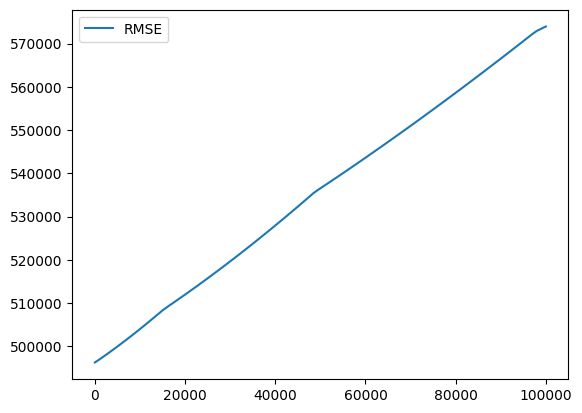

In [91]:
plt.plot(alphas, rmses, label='RMSE')
plt.legend();

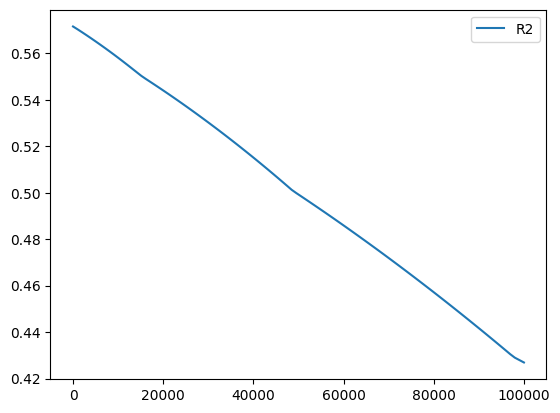

In [92]:
plt.plot(alphas, r2s, label='R2')
plt.legend();

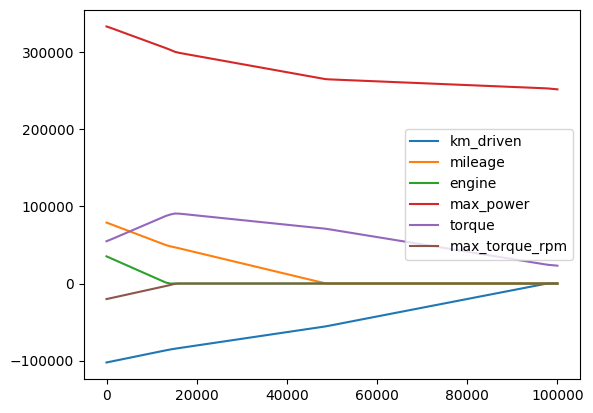

In [95]:
plt.plot(alphas, importences, label = feature_names)
plt.legend();

Зануляет плохо, тк порядки MSE гигантские, а веса умноженые на alpha ну там где-то болтаются, лоссу плевать на него.
А так при очень больших значениях первые умирают engine + max_torque_rpm

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.linspace(0, 1000000, 50),
    'max_iter': np.linspace(10, 1000, 10).astype(int)
}

lasso = Lasso()

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='r2')

grid_search.fit(X_train, y_train)

C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([      0.        ,   20408.16326531,   40816.32653061,
         61224.48979592,   81632.65306122,  102040.81632653,
        122448.97959184,  142857.14285714,  163265.30612245,
        183673.46938776,  204081.63265306,  224489.79591837,
        244897.95918367,  265306.12244898,  285714.28571429,
        306122.44897959,  326530.6122449 ,  346938.7755102 ,
        367346.93877551,  3...
        612244.89795918,  632653.06122449,  653061.2244898 ,
        673469.3877551 ,  693877.55102041,  714285.71428571,
        734693.87755102,  755102.04081633,  775510.20408163,
        795918.36734694,  816326.53061224,  836734.69387755,
        857142.85714286,  877551.02040816,  897959.18367347,
        918367.34693878,  938775.51020408,  959183.67346939,
        979591.83673469, 1000000.        ]),
                         'max_iter': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
             scoring='r2')

In [109]:
grid_search.best_params_

{'alpha': 20408.163265306124, 'max_iter': 120}

In [113]:
list(zip(grid_search.best_estimator_.coef_, feature_names))

[(-79961.65925908338, 'km_driven'),
 (39644.4249737187, 'mileage'),
 (0.0, 'engine'),
 (294592.6846162158, 'max_power'),
 (88045.78118396101, 'torque'),
 (-0.0, 'max_torque_rpm')]

1) 7 секунд на перебор 500 параметров
2) итерации подбирал и регурелизатор alpha
3) да пара признаков занулилась engine + max_torque_rpm

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [114]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.linspace(0, 1000000, 50),
    'l1_ratio': np.linspace(0, 1, 10),
    'max_iter': np.linspace(10, 1000, 10).astype(int)
}

elnet = ElasticNet()

grid_search = GridSearchCV(estimator=elnet, param_grid=param_grid, cv=10, scoring='r2')

grid_search.fit(X_train, y_train)

C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\bende\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([      0.        ,   20408.16326531,   40816.32653061,
         61224.48979592,   81632.65306122,  102040.81632653,
        122448.97959184,  142857.14285714,  163265.30612245,
        183673.46938776,  204081.63265306,  224489.79591837,
        244897.95918367,  265306.12244898,  285714.28571429,
        306122.44897959,  326530.6122449 ,  346938.7755102 ,
        367346.93877...
        795918.36734694,  816326.53061224,  836734.69387755,
        857142.85714286,  877551.02040816,  897959.18367347,
        918367.34693878,  938775.51020408,  959183.67346939,
        979591.83673469, 1000000.        ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
             scoring='r2')

In [115]:
grid_search.best_params_

{'alpha': 20408.163265306124, 'l1_ratio': 1.0, 'max_iter': 120}

In [116]:
list(zip(grid_search.best_estimator_.coef_, feature_names))

[(-79961.65925908338, 'km_driven'),
 (39644.4249737187, 'mileage'),
 (0.0, 'engine'),
 (294592.6846162158, 'max_power'),
 (88045.78118396101, 'torque'),
 (-0.0, 'max_torque_rpm')]

In [168]:
r2_score(y_test, grid_search.best_estimator_.predict(X_test))

0.5434715019979

1) Обучался 1.50 по 5к параметрам
2) взял l1_ratio=1 капееец

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



`Крч посмотрел на подходы людей и все сводится к тому, что мы хотим занулять веса рандомные во время обучения (дропаут обычный), тк L0 по сути говорит зануляй веса и получай вознаграждение, так давайте занулять принудительно рандомные веса, тогда это реализовать не шибко сложно. Возьму свой код с математики, только логлосс на мсе заменю`

In [ ]:
def expand(X):
    return np.concatenate((X, [[1]]*len(X)), axis=1)

def compute_loss(X, y, w):
    return np.mean((y - X @ w)**2)

def compute_grad(X, y, w):
    return - 2 / len(y) * X.T @ (y - X @ w)


In [129]:
from IPython import display

def visualize(history):
    """С помощью магии matplolib выдаёт красоты результатов классификации"""

    plt.plot(history)
    plt.grid()
    display.clear_output(wait=True)
    plt.show()

In [130]:
new_X_train = expand(X_train)
new_X_test = expand(X_test)

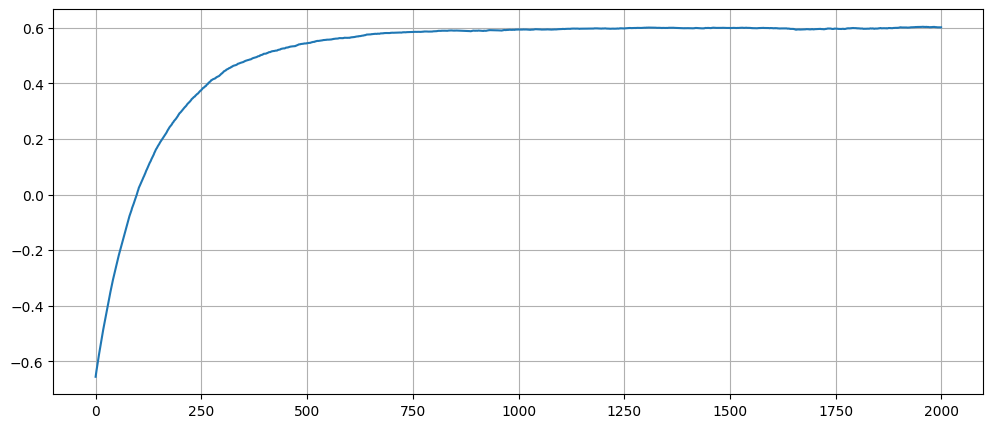

<Figure size 640x480 with 0 Axes>

In [173]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 0, 1])

eta = 10
p = 0.2
lambda_ = 1000
inds = list(range(len(X_train)))

n_iter = 2000
batch_size = len(X_train)
loss = np.zeros(n_iter)
r2scores = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    
    iter_indx = np.random.choice(inds, size=batch_size)
    mask = np.random.uniform(0, 1, size=len(w)) > p
    grad = compute_grad(new_X_train[iter_indx], y_train[iter_indx], w*mask) + lambda_ * np.sum(mask)
    w = w - eta / batch_size * grad
    loss[i] = compute_loss(new_X_test, y_test, w)
    r2scores[i] = r2_score(y_test, new_X_test @ w)

# visualize(loss)
visualize(r2scores)
plt.clf()

In [174]:
r2_score(y_test, new_X_test @ w)

0.6016788383697158

In [175]:
w

array([-139148.16389338,   84300.66454304,   42179.53996324,
        319345.16350754,  164248.43522892,    6367.2322314 ,
        638432.29647675])

Да это жестко даже r2 поднялся

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Давайте оставим марку машины и модель наверное

In [182]:
df_train['brand'] = df_train['name'].apply(lambda x: x.split(' ')[0])
df_train['model'] = df_train['name'].apply(lambda x: x.split(' ')[1])

df_test['brand'] = df_test['name'].apply(lambda x: x.split(' ')[0])
df_test['model'] = df_test['name'].apply(lambda x: x.split(' ')[1])

C:\Users\bende\AppData\Local\Temp\ipykernel_28508\2051519286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['brand'] = df_train['name'].apply(lambda x: x.split(' ')[0])
C:\Users\bende\AppData\Local\Temp\ipykernel_28508\2051519286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['model'] = df_train['name'].apply(lambda x: x.split(' ')[1])


In [195]:
feature_names = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 
                 'max_torque_rpm', 'year']

cat_features = ['seats', 'brand', 'model', 'seller_type', 'transmission', 'owner', 'fuel']

y_train = df_train['selling_price']
X_train_cat = df_train[feature_names + cat_features]

y_test = df_test['selling_price']
X_test_cat = df_test[feature_names + cat_features]

In [ ]:
# assert X_train_cat.shape == (5840, 11)

In [186]:
X_train_cat.describe(include='object')

brand  model seller_type transmission        owner    fuel
count     5840   5840        5840         5840         5840    5840
unique      30    202           3            2            5       4
top     Maruti  Swift  Individual       Manual  First Owner  Diesel
freq      1804    558        5223         5336         3603    3177

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [189]:
X_train_cat

km_driven    mileage  engine  max_power  torque  max_torque_rpm  \
0        145500  16.714286  1248.0      74.00  190.00          2000.0   
1        120000  15.100000  1498.0     103.52  250.00          2500.0   
2        127000  16.428571  1396.0      90.00  219.52          2750.0   
3        120000  11.500000  1298.0      88.20  112.70          4500.0   
4         45000  14.385714  1197.0      81.86  113.75          4000.0   
...         ...        ...     ...        ...     ...             ...   
5835     191000  12.800000  1086.0      62.10   96.10          3000.0   
5836      50000  13.500000   998.0      67.10   90.00          3500.0   
5837     110000  13.214286  1197.0      82.85  113.70          4000.0   
5838     119000  12.000000  1493.0     110.00  235.20          2750.0   
5839     120000  13.785714  1248.0      73.90  190.00          2000.0   

        brand   model seller_type transmission                 owner    fuel  \
0      Maruti   Swift  Individual       Manual           First Owner  Diesel   
1       Skoda   Rapid  Individual       Manual          Second Owner  Diesel   
2     Hyundai     i20  Individual       Manual           First Owner  Diesel   
3      Maruti   Swift  Individual       Manual           First Owner  Petrol   
4     Hyundai   Xcent  Individual       Manual           First Owner  Petrol   
...       ...     ...         ...          ...                   ...     ...   
5835  Hyundai  Santro  Individual       Manual           First Owner  Petrol   
5836   Maruti   Wagon  Individual       Manual          Second Owner  Petrol   
5837  Hyundai     i20  Individual       Manual           First Owner  Petrol   
5838  Hyundai   Verna  Individual       Manual  Fourth & Above Owner  Diesel   
5839   Maruti   Swift  Individual       Manual           First Owner  Diesel   

      year  seats  
0     2014    5.0  
1     2014    5.0  
2     2010    5.0  
3     2007    5.0  
4     2017    5.0  
...    ...    ...  
5835  2008    5.0  
5836  2013    5.0  
5837  2013    5.0  
5838  2007    5.0  
5839  2009    5.0  

[5840 rows x 14 columns]

In [217]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

onehot = OneHotEncoder(drop='first')
onehot.fit(pd.concat((X_train_cat[cat_features], X_test_cat[cat_features]))) # иначе он не видит часть данных
X_train_cat_oh = onehot.transform(X_train_cat[cat_features]).toarray()
X_test_cat_oh = onehot.transform(X_test_cat[cat_features]).toarray()

In [218]:
X_train_cat_full = np.concatenate((np.array(X_train_cat[feature_names]), X_train_cat_oh), axis=1)
X_test_cat_full = np.concatenate((np.array(X_test_cat[feature_names]), X_test_cat_oh), axis=1)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1) Смотреть не много ли у нас уникальных значчений в столбцах, тк если много, то матрица будет сильно разрежена
2) Потому что мы один признак мы явно можем узнать, если все остальные нули
3) Нет, мы же кодируем все уникальные значения

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [222]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV



param_grid = {
    'alpha': np.linspace(0, 1000, 10),
    'max_iter': np.linspace(10, 1000, 10).astype(int)
}

ridge =  Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='r2')

grid_search.fit(X_train_cat_full, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([   0.        ,  111.11111111,  222.22222222,  333.33333333,
        444.44444444,  555.55555556,  666.66666667,  777.77777778,
        888.88888889, 1000.        ]),
                         'max_iter': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000])},
             scoring='r2')

In [223]:
r2_score(y_test, grid_search.best_estimator_.predict(X_test_cat_full))

0.7104473620902152

Да улучшили, еще бы не улучшили

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true <= 0.1)

y_pred = grid_search.best_estimator_.predict(X_test_cat_full)
business_metrics(y_test, y_pred)

0.272

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [226]:
def your_business_metrics(y_true, y_pred, aplha: int = 10):
    return np.mean((alpha + 1)*np.abs(y_true - y_pred) /(y_true + alpha*y_pred)<= 0.1)
your_business_metrics(y_test, y_pred)

0.336

In [227]:
your_business_metrics(y_test, new_X_test @ w)

0.216

Ну крч метрика SMAPE просто к ней кэф накинул растягивающий, чтобы перепрогноз меньше штрафовался. А так ну очев ridge заработал, тк в нем данных больше в целом

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [236]:
from joblib import dump, load
dump(best_model, 'ridge.joblib') 
dump(onehot, 'onehot.joblib') 

['onehot.joblib']

In [230]:
best_model = grid_search.best_estimator_

In [231]:
onehot

OneHotEncoder(drop='first')

In [239]:
df_train.iloc[0]

name              Maruti Swift Dzire VDI
year                                2014
selling_price                     450000
km_driven                         145500
fuel                              Diesel
seller_type                   Individual
transmission                      Manual
owner                        First Owner
mileage                        16.714286
engine                            1248.0
max_power                           74.0
torque                             190.0
seats                                5.0
max_torque_rpm                    2000.0
brand                             Maruti
model                              Swift
Name: 0, dtype: object

In [234]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()

FEATURE_NAMES = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'year']
CAT_FEATURES = ['seats', 'brand', 'model', 'seller_type', 'transmission', 'owner', 'fuel']

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]
    
def converte_mileage(mil):
    if mil is None or (isinstance(mil, float) and isnan(mil)): return None
    if mil.split(' ')[1] == 'kmpl':
        return float(mil.split(' ')[0]) / 1.40
    return float(mil.split(' ')[0])

def converte_engine(eng):
    if eng is None or (isinstance(eng, float) and isnan(eng)): return None
    return float(eng.split(' ')[0])

def converte_max_power(mp):
    if (
        mp is None or 
        (isinstance(mp, str) and mp.split(' ')[0] == '') or
        (isinstance(mp, float) and isnan(mp))
    ): return None
    return float(mp.split(' ')[0])

def extract_torque_rpm(entry):
    if entry is None or entry == '' or (isinstance(entry, float) and isnan(entry)): return None, None
    pattern = re.compile(
        r"""
        (?P<torque_value>\d+(?:\.\d+)?)
        \s*
        (?:Nm|nm|kgm)?
        \s*
        (?:@|at)?
        \s*
        (?P<rpm_range>[\d,]+(?:-[\d,]+)?)
        """,
        re.VERBOSE | re.IGNORECASE
    )
    match = pattern.search(entry)

    torque_value = match.group('torque_value')
    rpm_values = match.group('rpm_range')
    
    
    rpm_values = rpm_values.replace(',', '')
    
    if '-' in rpm_values:
        rpm_values = rpm_values.split('-')
        rpm_values = rpm_values[-1]
        
    if float(torque_value) <= 40: # оцениваю по порядку чтоб привести к nm, потому что где-то есть пропуски kgm или nm, так что плевать
        torque_value = float(torque_value)*9.8
    
    return torque_value, rpm_values

def prepare_data(item: Item) -> dict:
    res = {}
    res['brand'] = item.name.split(' ')[0]
    res['model'] = item.name.split(' ')[1]
    res['mileage'] = converte_mileage(item.mileage)
    res['engine'] = converte_mileage(item.engine) 
    res['max_power'] = converte_max_power(item.max_power)
    res['torque'], res['max_torque_rpm'] = extract_torque_rpm(item.torque)
    for cat_feature in CAT_FEATURES:
        if cat_feature not in res:
            res[cat_feature] = item[cat_feature]
    return res

def predict_model(data: dict) -> float:
    one_hot_cat_features = onehot.transform([data[cat_feature] for cat_feature in CAT_FEATURES]).toarray()
    float_features = np.array([data[float_feature] for float_feature in FEATURE_NAMES])
    features_full = np.concatenate((float_features, one_hot_cat_features), axis=1)
    return best_model.predict(features_full)


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    data = prepare_data(item)
    predict_ = predict_model(data)
    return predict_


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    preds = []
    for item in items:
        data = prepare_data(item)
        predict_ = predict_model(data)
        preds += [predict_]
    return preds

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Думаю кот Елены